In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import tensorflow.keras as keras
import tensorflow  as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

from tensorflow.keras.callbacks import *

from sklearn.metrics import mean_absolute_error
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import os

In [43]:
frame = pd.read_csv(r'ausleihen_2015_2018_temp_week1.csv')
#frame = pd.read_csv(r'ausleihen_mit_wetter.csv')
df = pd.DataFrame(frame)
col = list(df.columns.values)

test = pd.DataFrame(frame)

df.head()

,year,week,station1,count,tempC,sunHour,FeelsLikeC,week1anzahl
0,2015,1,1 Ave & E 18 St,119,6.0,6.525,-1.25,0.0
1,2015,1,1 Ave & E 30 St,147,6.0,6.525,-1.25,0.0
2,2015,1,1 Ave & E 44 St,73,6.0,6.525,-1.25,0.0
3,2015,1,11 Ave & W 27 St,73,6.0,6.525,-1.25,0.0
4,2015,1,11 Ave & W 41 St,133,6.0,6.525,-1.25,0.0


In [44]:
stationnamesframe =   test.drop_duplicates() 
stationnamesframe = pd.DataFrame(stationnamesframe,columns=['station1'])
stationnamesframe =   stationnamesframe.drop_duplicates() 
stationnames =  pd.DataFrame(stationnamesframe , columns=['station1'])['station1'].to_numpy().tolist()
print(len(stationnames))

692


In [7]:
for index, row in df.iterrows():
    year = row["year"]
    week = row["week"]
    date = "{}-{}-1".format(year, week)
    dt = datetime.strptime(date, "%Y-%W-%w")
    print(dt)
#return dt.strftime("%Y-%m-%dT%H:%M:%S.%f")[:-3] + 'Z'

2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00
2015-01-05 00:00:00


2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00
2015-02-02 00:00:00


2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-02-23 00:00:00
2015-03-02 00:00:00
2015-03-02 00:00:00
2015-03-02 00:00:00


2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00
2015-03-23 00:00:00


2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00
2015-04-13 00:00:00


2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00
2015-05-04 00:00:00


2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00
2015-06-01 00:00:00


2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-22 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00
2015-06-29 00:00:00


2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00
2015-07-20 00:00:00


2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00
2015-08-17 00:00:00


2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00
2015-08-31 00:00:00


2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00
2015-09-21 00:00:00


2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00
2015-10-05 00:00:00


2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00
2015-10-19 00:00:00


2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00
2015-11-09 00:00:00


2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00
2015-11-23 00:00:00


2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00
2015-12-14 00:00:00


2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00
2015-12-28 00:00:00


2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00
2016-01-11 00:00:00


2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00
2016-01-25 00:00:00


2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00
2016-02-08 00:00:00


2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00
2016-02-22 00:00:00


2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00
2016-03-14 00:00:00


2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00
2016-03-28 00:00:00


2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00
2016-04-11 00:00:00


2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00
2016-04-25 00:00:00


2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00
2016-05-16 00:00:00


2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00
2016-05-23 00:00:00


2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00
2016-06-13 00:00:00


2016-06-20 00:00:00
2016-06-20 00:00:00
2016-06-20 00:00:00
2016-06-20 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00
2016-06-27 00:00:00


2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00
2016-07-11 00:00:00


2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00
2016-07-25 00:00:00


2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00
2016-08-08 00:00:00


2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00
2016-08-15 00:00:00


2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00
2016-08-29 00:00:00


2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00
2016-09-12 00:00:00


2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-09-26 00:00:00
2016-10-03 00:00:00
2016-10-03 00:00:00
2016-10-03 00:00:00
2016-10-03 00:00:00
2016-10-03 00:00:00
2016-10-03 00:00:00
2016-10-03 00:00:00
2016-10-03 00:00:00
2016-10-03 00:00:00
2016-10-03 00:00:00
2016-10-03 00:00:00
2016-10-03 00:00:00


2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00
2016-10-17 00:00:00


2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00
2016-10-31 00:00:00


2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00
2016-11-07 00:00:00


2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00
2016-11-21 00:00:00


2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00
2016-12-05 00:00:00


2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00
2016-12-12 00:00:00


2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00
2016-12-26 00:00:00


2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00
2017-01-02 00:00:00


2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00
2017-01-16 00:00:00


2017-01-23 00:00:00
2017-01-23 00:00:00
2017-01-23 00:00:00
2017-01-23 00:00:00
2017-01-23 00:00:00
2017-01-23 00:00:00
2017-01-23 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00
2017-01-30 00:00:00


2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00
2017-02-13 00:00:00


2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00
2017-02-27 00:00:00


2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00
2017-03-13 00:00:00


2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00
2017-03-27 00:00:00


2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-03 00:00:00
2017-04-10 00:00:00
2017-04-10 00:00:00
2017-04-10 00:00:00
2017-04-10 00:00:00
2017-04-10 00:00:00
2017-04-10 00:00:00
2017-04-10 00:00:00


2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-17 00:00:00
2017-04-24 00:00:00
2017-04-24 00:00:00
2017-04-24 00:00:00
2017-04-24 00:00:00
2017-04-24 00:00:00
2017-04-24 00:00:00
2017-04-24 00:00:00
2017-04-24 00:00:00
2017-04-24 00:00:00
2017-04-24 00:00:00
2017-04-24 00:00:00


2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00


2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-08 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00
2017-05-15 00:00:00


2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00
2017-05-22 00:00:00


2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00
2017-06-05 00:00:00


2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00
2017-06-12 00:00:00


2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00
2017-06-26 00:00:00


2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00
2017-07-10 00:00:00


2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00
2017-07-24 00:00:00


2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00
2017-07-31 00:00:00


2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-14 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00
2017-08-21 00:00:00


2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00
2017-08-28 00:00:00


2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00
2017-09-11 00:00:00


2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00
2017-09-25 00:00:00


2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00
2017-10-09 00:00:00


2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00
2017-10-16 00:00:00


2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00
2017-10-30 00:00:00


2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00
2017-11-13 00:00:00


2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00
2017-11-20 00:00:00


2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00
2017-12-04 00:00:00


2017-12-11 00:00:00
2017-12-11 00:00:00
2017-12-11 00:00:00
2017-12-11 00:00:00
2017-12-11 00:00:00
2017-12-11 00:00:00
2017-12-11 00:00:00
2017-12-11 00:00:00
2017-12-11 00:00:00
2017-12-11 00:00:00
2017-12-11 00:00:00
2017-12-11 00:00:00
2017-12-11 00:00:00
2017-12-11 00:00:00
2017-12-11 00:00:00
2017-12-11 00:00:00
2017-12-11 00:00:00
2017-12-11 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00
2017-12-18 00:00:00


2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00
2017-12-25 00:00:00


2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00
2018-01-08 00:00:00


2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00
2018-01-15 00:00:00


2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-22 00:00:00
2018-01-29 00:00:00
2018-01-29 00:00:00
2018-01-29 00:00:00
2018-01-29 00:00:00
2018-01-29 00:00:00
2018-01-29 00:00:00
2018-01-29 00:00:00
2018-01-29 00:00:00
2018-01-29 00:00:00


2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00
2018-02-05 00:00:00


2018-02-12 00:00:00
2018-02-12 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00
2018-02-19 00:00:00


2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00
2018-02-26 00:00:00


2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00
2018-03-12 00:00:00


2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00
2018-03-19 00:00:00


2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00
2018-03-26 00:00:00


2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00
2018-04-02 00:00:00


2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-09 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00
2018-04-16 00:00:00


2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00
2018-04-23 00:00:00


2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00
2018-04-30 00:00:00


2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-07 00:00:00
2018-05-14 00:00:00
2018-05-14 00:00:00
2018-05-14 00:00:00
2018-05-14 00:00:00
2018-05-14 00:00:00
2018-05-14 00:00:00
2018-05-14 00:00:00
2018-05-14 00:00:00
2018-05-14 00:00:00
2018-05-14 00:00:00
2018-05-14 00:00:00
2018-05-14 00:00:00
2018-05-14 00:00:00
2018-05-14 00:00:00
2018-05-14 00:00:00
2018-05-14 00:00:00
2018-05-14 00:00:00


2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00
2018-05-21 00:00:00


2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00
2018-06-04 00:00:00


2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00
2018-06-11 00:00:00


2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00
2018-06-18 00:00:00


2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00
2018-06-25 00:00:00


2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00
2018-07-09 00:00:00


2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00
2018-07-16 00:00:00


KeyboardInterrupt: 

In [8]:
df_without_humidity = df.drop(['humidity','precipMM'], axis=1, errors='ignore')

In [9]:
df_without_humidity.head()

,year,week,station1,count,tempC,sunHour,FeelsLikeC
0,2015,1,1 Ave & E 18 St,119,6.0,6.525,-1.25
1,2015,1,1 Ave & E 30 St,147,6.0,6.525,-1.25
2,2015,1,1 Ave & E 44 St,73,6.0,6.525,-1.25
3,2015,1,11 Ave & W 27 St,73,6.0,6.525,-1.25
4,2015,1,11 Ave & W 41 St,133,6.0,6.525,-1.25


In [45]:
#get input and output
x = df.drop("count",axis=1)
y = df["count"]

In [46]:
#split data into train and test
x_train, x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=False)

In [47]:
#normalise data
ct = make_column_transformer(
 (MinMaxScaler(),["year","week","tempC","sunHour","FeelsLikeC","week1anzahl"]),
     (OneHotEncoder(handle_unknown="ignore"),["station1"]))

 

ct.fit(x_train)

x_train_normalized = ct.transform(x_train)

x_test_normalized = ct.transform(x_test)

x_train_normalized.shape

print(x_test_normalized.shape)

(20851, 698)


In [48]:
#create Model structure
with tf.device('/device:CPU:0'):
    model = Sequential()
    model.add(Dense(698, kernel_initializer='normal',  activation='relu', input_shape=(698,) ))    
    model.add(Dense(350, kernel_initializer='normal',activation='relu'))   
    model.add(Dense(350, kernel_initializer='normal',activation='relu'))   
    model.add(Dense(1, kernel_initializer='normal',activation=None))

In [49]:
#set model loss and optimizer
with tf.device('/device:CPU:0'):
    model.compile(optimizer= Adam(learning_rate=0.0001),loss='mae', metrics=['mae','mape'])

In [50]:
#checkpoint to save best Model which isnt overfitted
checkpoint = ModelCheckpoint('Model1', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min' )

In [51]:
#train Model
with tf.device('/device:CPU:0'):
    history = model.fit(x_train_normalized, y_train.values, epochs=30 , batch_size=30,shuffle=False   )

Epoch 1/30


/home/max/.local/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_4/dense_16/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_4/dense_16/embedding_lookup_sparse/Reshape:0", shape=(None, 698), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_4/dense_16/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2781/2781 [==============================] - 15s 5ms/step - loss: 164.5233 - mae: 164.5233 - mape: 104.8595
Epoch 2/30
2781/2781 [==============================] - 15s 5ms/step - loss: 78.3007 - mae: 78.3007 - mape: 37.9936
Epoch 3/30
2781/2781 [==============================] - 14s 5ms/step - loss: 72.2288 - mae: 72.2288 - mape: 31.1515
Epoch 4/30
2781/2781 [==============================] - 14s 5ms/step - loss: 69.4129 - mae: 69.4129 - mape: 28.7956
Epoch 5/30
2781/2781 [==============================] - 14s 5ms/step - loss: 67.8529 - mae: 67.8529 - mape: 27.4900
Epoch 6/30
2781/2781 [==============================] - 14s 5ms/step - loss: 66.6665 - mae: 66.6665 - mape: 26.6335
Epoch 7/30
2781/2781 [==============================] - 14s 5ms/step - loss: 65.8673 - mae: 65.8673 - mape: 26.0516
Epoch 8/30
2781/2781 [==============================] - 14s 5ms/step - loss: 65.2223 - mae: 65.2223 - mape: 25.6195
Epoch 9/30
2781/2781 [==============================] - 15s 5ms/step - loss: 64.

In [52]:
model.evaluate(x_test_normalized,y_test.values)

652/652 [==============================] - 1s 2ms/step - loss: 98.9343 - mae: 98.9343 - mape: 35.8244


[98.93433380126953, 98.93433380126953, 35.82438659667969]

In [53]:
stationnamesframe =   test.drop_duplicates() 
stationnamesframe = pd.DataFrame(stationnamesframe,columns=['station1'])
stationnamesframe =   stationnamesframe.drop_duplicates() 
stationnames =  pd.DataFrame(stationnamesframe , columns=['station1'])['station1'].to_numpy().tolist()
print(len(stationnames))

692


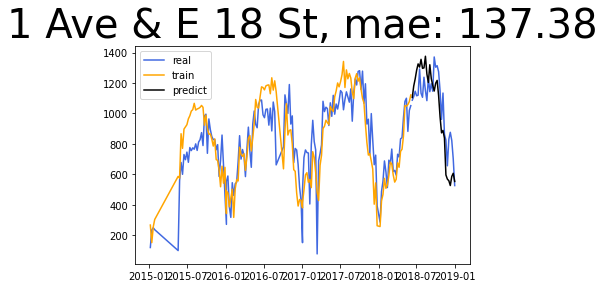

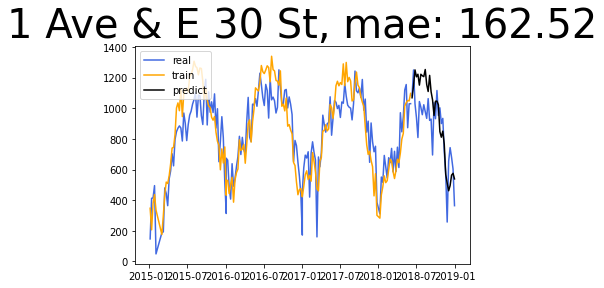

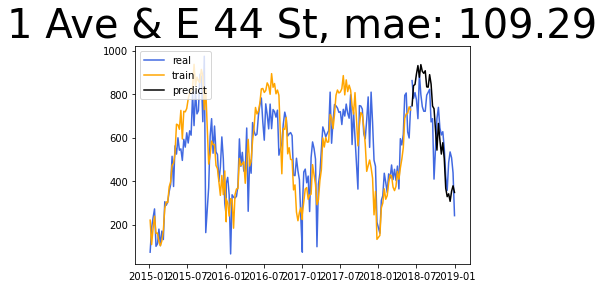

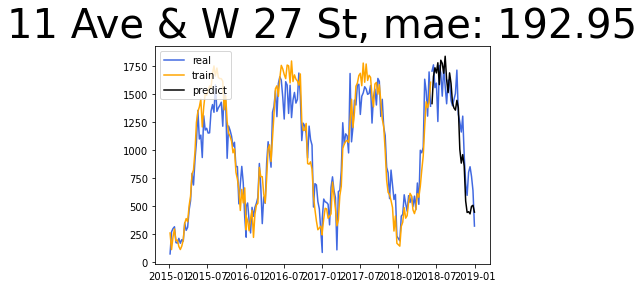

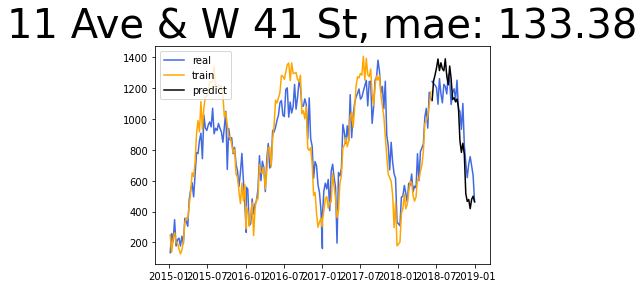

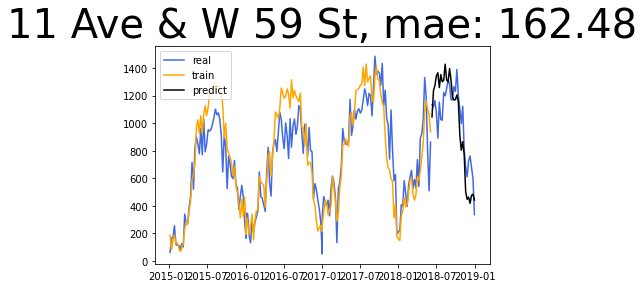

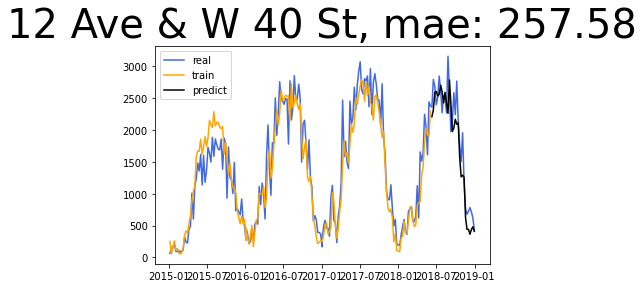

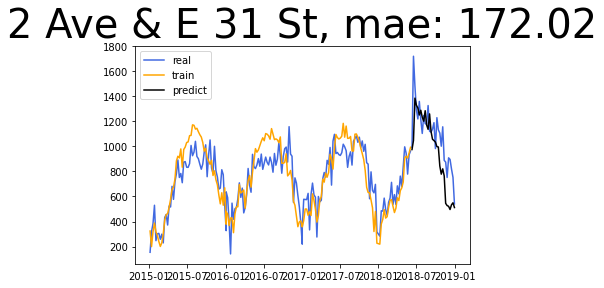

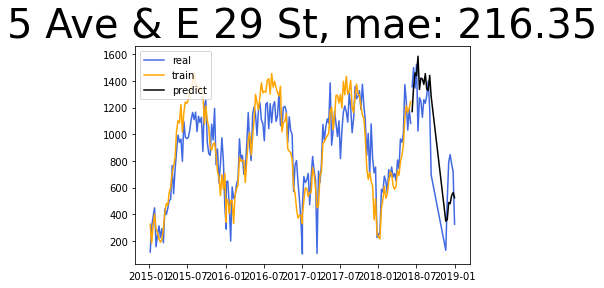

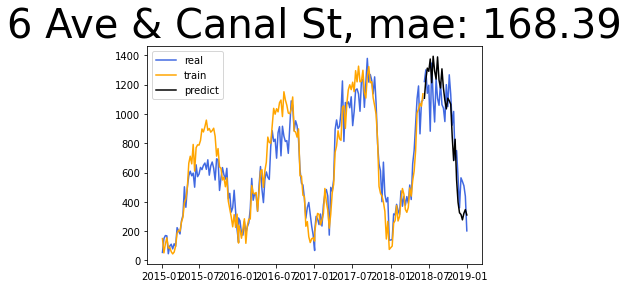

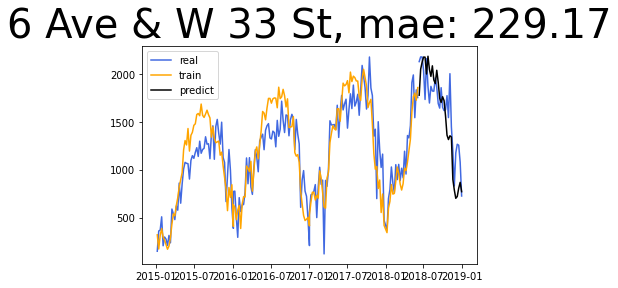

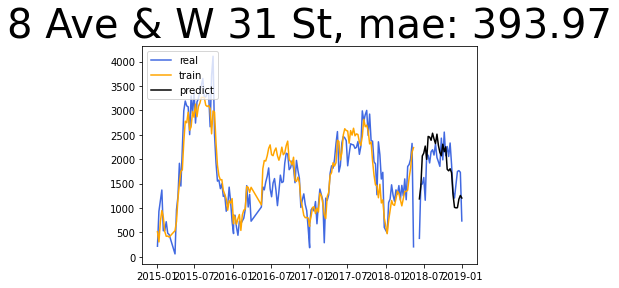

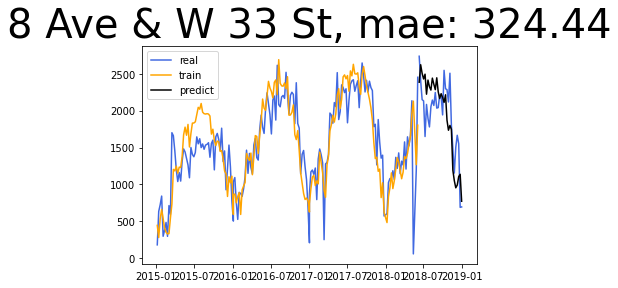

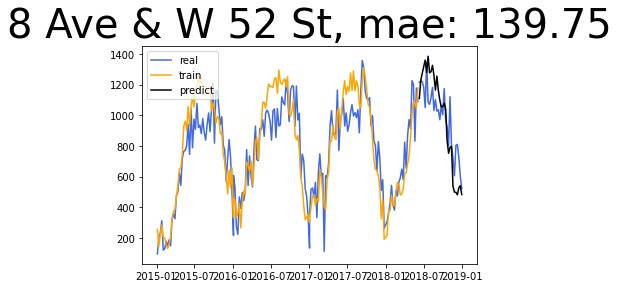

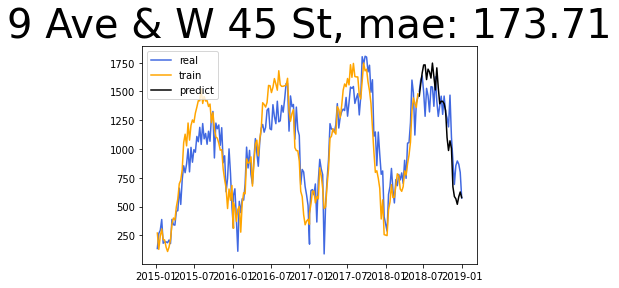

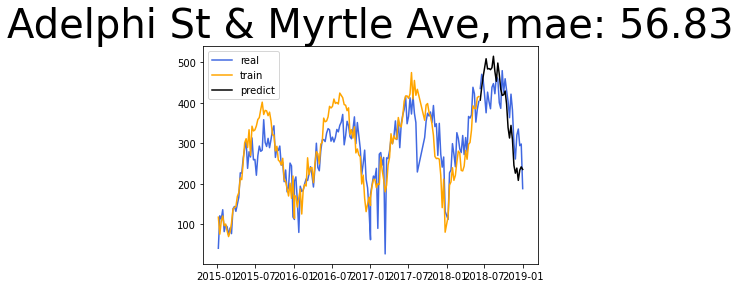

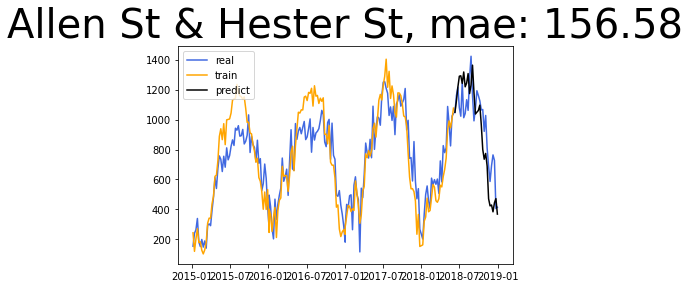

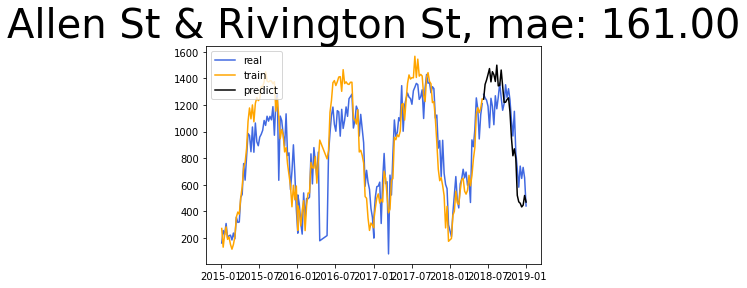

KeyboardInterrupt: 

In [54]:
#show result data linear

for station in stationnames:
    predict_train = model.predict(x_train_normalized)
    y1 =  y_train 
    y2 =  predict_train 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#

    test1 = test.iloc[:y_train.shape[0]]
    test1 = pd.DataFrame(test1)
    test1['y'] = y1
    test1['y2'] = y2
    test1 = test1[test1['station1']==station]
    test1['yearweek'] = pd.to_datetime(test1['year'].astype(str) + ' ' + test1['week'].astype(str) + ' 1',format='%Y %U %w')
    #print(test1)

    plt.plot(test1['yearweek'],test1['y'],label='real' , color = 'royalblue'  )
    plt.plot(test1['yearweek'],test1['y2'],label='train' , color = 'orange'  )
    predict_test = model.predict(x_test_normalized)
    y1 =  y_test 
    y2 =  predict_test 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
    test2 = test.iloc[-y_test.shape[0]:]
    test2 = pd.DataFrame(test2)
    #print(test2)
    test2['y'] = y1
    test2['y2'] = y2
    test2 = test2[test2['station1']==station]
    test2['yearweek'] = pd.to_datetime(test2['year'].astype(str) + ' ' + test2['week'].astype(str) + ' 1',format='%Y %U %w')
    #print(test2)
    #print(test2['y'])
    
    try:
        mae = mean_absolute_error(test2['y'] ,test2['y2'] )
        plt.title(label=station+", mae: {:0.2f}".format(mae) ,
          fontsize=40,
          color="black")
        #plt.show()
    except:
        plt.title(label=station+", mae: nan"  ,
          fontsize=40,
          color="black")
    plt.plot(test2['yearweek'],test2['y'],label='_Hidden' , color = 'royalblue'  )
    plt.plot(test2['yearweek'],test2['y2'],label='predict' , color = 'black' )
    
    plt.legend(loc="upper left")
    #plt.savefig( 'Model1Images/'+station+'linear.jpg',bbox_inches='tight', dpi=150)
    plt.show()